In [ ]:
import tensorflow as tf
import numpy as np
import imghdr
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,InputLayer,BatchNormalization
from tensorflow.keras.metrics import BinaryCrossentropy,categorical_crossentropy,sparse_categorical_crossentropy,Recall,Precision
from tensorflow.keras.optimizers import Adam

In [ ]:
# data_dir="/content/drive/MyDrive/Projects /skin dataset"

In [ ]:
# os.listdir(os.path.join(data_dir,'train'))

In [ ]:
#image_ext=['jpeg','png','jpg','bmp']
# for image_class in os.listdir(data_dir):
#   for image in os.listdir(os.path.join(data_dir,image_class)):
#     image_path=os.path.join(data_dir,image_class,image)
#     try:
#       img = cv2.imread(image_path)
#       tip = imghdr.what(image_path)
#       if tip not in image_ext:
#         print('image not in ext list {}'.format(image_path))
#         os.remove(image_path)
#     except Exception as e:
#       print("issue with image {}".format{image_Path})

In [ ]:
# img=cv2.imread(os.path.join('data','train','Melanoma','/content/drive/MyDrive/Projects /skin dataset/train/Melanoma/ISIC_0000004.jpg'))

In [ ]:
# img.shape

In [ ]:
# plt.imshow(img)

##Data Loading

In [ ]:
data =tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Projects /skin_dataset")

Found 2308 files belonging to 8 classes.


In [ ]:
data_iterator=data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
print(type(batch))
print(len(batch))
for idx, element in enumerate(batch):
    print(f"Element {idx}: {element.shape if hasattr(element,'s hape') else element}")


<class 'tuple'>
2
Element 0: (32, 256, 256, 3)
Element 1: (32,)


In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:

print(batch[0])

[[[[1.83028687e+02 1.37496765e+02 1.42451904e+02]
   [1.83490295e+02 1.36459045e+02 1.42447205e+02]
   [1.81621094e+02 1.34892883e+02 1.38135620e+02]
   ...
   [1.86960938e+02 1.44961487e+02 1.37990540e+02]
   [1.87968750e+02 1.44980591e+02 1.38359497e+02]
   [1.85897766e+02 1.44716736e+02 1.38060486e+02]]

  [[1.82615051e+02 1.36478333e+02 1.39888489e+02]
   [1.80408020e+02 1.35390259e+02 1.38665833e+02]
   [1.82079773e+02 1.33079773e+02 1.39079773e+02]
   ...
   [1.88514587e+02 1.45155212e+02 1.39592712e+02]
   [1.86748596e+02 1.45851929e+02 1.39569275e+02]
   [1.85013489e+02 1.42398438e+02 1.36138855e+02]]

  [[1.84929138e+02 1.39424683e+02 1.42741089e+02]
   [1.84787415e+02 1.38889587e+02 1.42102173e+02]
   [1.84359375e+02 1.38042969e+02 1.41359375e+02]
   ...
   [1.85286743e+02 1.42248840e+02 1.35973511e+02]
   [1.87662231e+02 1.44973694e+02 1.38766052e+02]
   [1.86202026e+02 1.41272888e+02 1.36414612e+02]]

  ...

  [[1.72575317e+02 1.11426331e+02 1.12072510e+02]
   [1.72020569e+

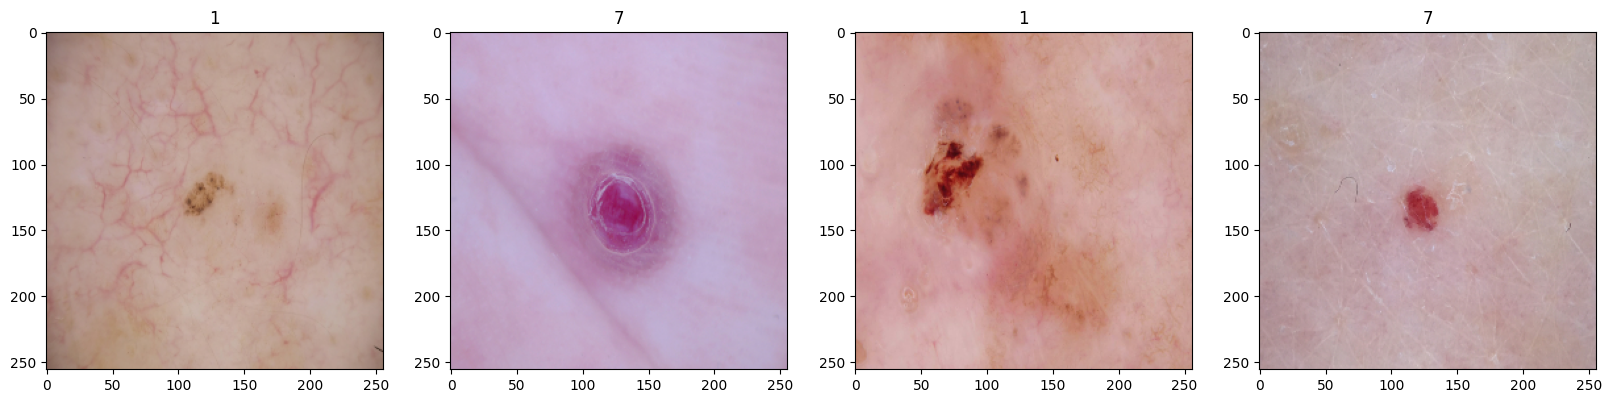

In [ ]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

##pre processing

In [ ]:
#scaling data
data = data.map(lambda x,y: (x/255,y))
# val_data=v_data.map(lambda x,y: (x/255,y))

In [ ]:

scaled_iterator = data.as_numpy_iterator()
# vscal_iterate=val_data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()
# val_batch=vscal_iterate.next()

In [ ]:
batch[0].shape
# val_batch[0].shape

(32, 256, 256, 3)

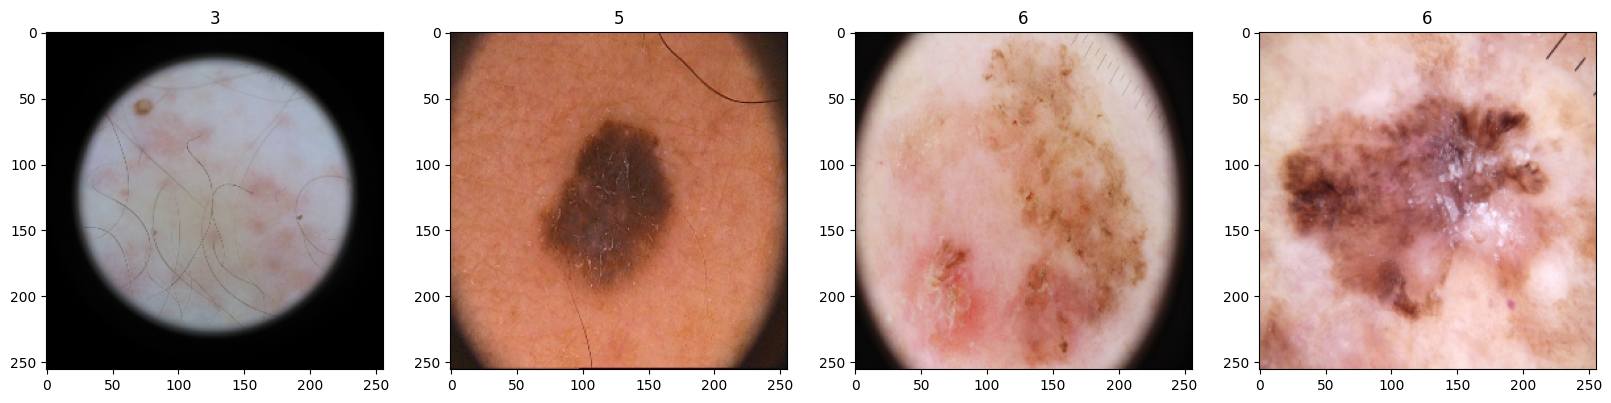

In [ ]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
# fig, ax = plt.subplots(ncols=4,figsize=(20,20))
# for idx, img in enumerate(val_batch[0][:4]):
#   ax[idx].imshow(img)
#   ax[idx].title.set_text(val_batch[1][idx])

In [ ]:
len(data)

73

##spliting data in train validation and testing

In [ ]:
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
  DATASET_SIZE = len(dataset)

  train_dataset= dataset.take(int(TRAIN_RATIO*DATASET_SIZE))

  val_test_dataset= dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset=val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))

  test_dataset= val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
  return train_dataset,val_dataset,test_dataset

In [ ]:
# train_size = int(len(data)*.7)
# test_size = int(len(data)*.1)+1
# val_size = int(len(val_data))

TRAIN_RATIO=0.9
VAL_RATIO=0.1
TEST_RATIO=0.1

# dataset = tf.data.Dataset.range(10)
train_dataset,val_dataset,test_dataset = splits(data,TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
# print(list(train_dataset.take(1).as_numpy_iterator()),list(val_dataset.take(1).as_numpy_iterator()),list(test_dataset.take(1).as_numpy_iterator()))

In [ ]:
len(test_dataset)

1

In [ ]:
len(val_dataset)

7

In [ ]:
len(train_dataset)

65

In [ ]:

train_dataset = train_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True)
val_dataset = val_dataset.shuffle(buffer_size=8,reshuffle_each_iteration=True)

In [ ]:
# train = data.take(train_size)
# val = val_data.take(val_size)
# test = data.skip(train_size).take(test_size)

##building deep learning model

In [ ]:
IM_SIZE=256
model = tf.keras.Sequential([
    InputLayer(shape=(IM_SIZE,IM_SIZE,3)),

    Conv2D(filters= 6, kernel_size=3 ,strides=1, padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size= 2,strides=2),

    Conv2D(filters=16,kernel_size=3, strides=1,padding='valid',activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Flatten(),
    Dense(100,activation='relu'),
    BatchNormalization(),
    Dense(32,activation='relu'),
    BatchNormalization(),
    Dense(8,activation='sigmoid')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 254, 254, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 125, 125, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │       6,150,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           3,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,155,660 (23.48 MB)

 Trainable params: 6,155,352 (23.48 MB)

 Non-trainable params: 308 (1.20 KB)

In [ ]:
model.compile('adam',  loss='sparse_categorical_crossentropy',metrics=['accuracy'])

##Training

In [ ]:
# logdir='/content/drive/MyDrive/Projects /logs'

In [ ]:
# tensorboard_callback= tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
 hist = model.fit(train_dataset,validation_data=val_dataset,epochs=20,verbose=1)

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.2422 - loss: 2.2064 - val_accuracy: 0.1250 - val_loss: 2.1909
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.4177 - loss: 1.5578 - val_accuracy: 0.1652 - val_loss: 2.1317
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.5093 - loss: 1.3291 - val_accuracy: 0.2188 - val_loss: 2.0452
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5969 - loss: 1.1396 - val_accuracy: 0.2054 - val_loss: 1.9685
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.6971 - loss: 0.8926 - val_accuracy: 0.3036 - val_loss: 1.8082
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.7898 - loss: 0.6641 - val_accuracy: 0.2768 - val_loss: 1.8242
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.8843 - loss: 0.4514 - val_accuracy: 0.3616 - val_loss: 1.7103
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9352 - loss: 0.2861 - val_accuracy: 0.4821 - v

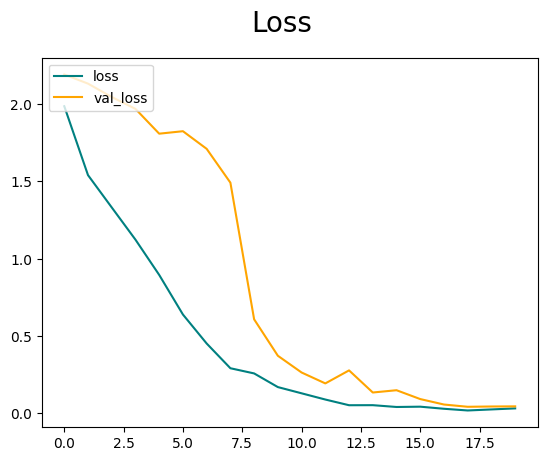

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

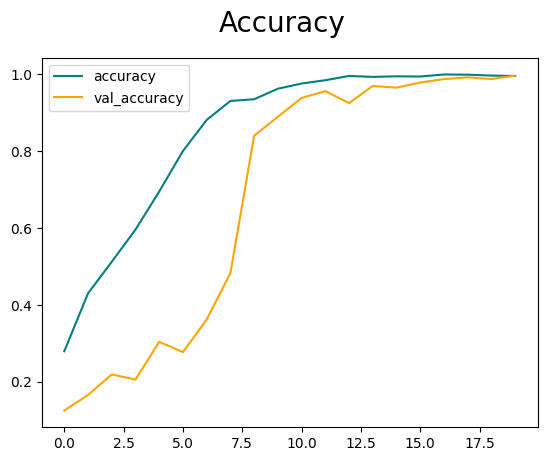

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
test_dataset

<_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model.evaluate(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - accuracy: 1.0000 - loss: 0.0091


[0.009124621748924255, 1.0]

In [ ]:
model.predict(test_dataset.take(1))[0][1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step


0.06263841

In [ ]:
model.save('/content/drive/MyDrive/Projects /skin_model.h5')